<a href="https://colab.research.google.com/github/AabidMK/RealtyAI_Infosys_Internship_Aug2025/blob/sadiya_aboobacker/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:


import pandas as pd



# Read CSV (replace with your uploaded filename if different)
df = pd.read_csv("/content/drive/MyDrive/dataset_infosys/dataset_3/Real Estate Data V21.csv")

print(df.shape)
print(df.columns)
df.head()



(14528, 9)
Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')


,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Colab settings
sns.set(style="whitegrid")


In [32]:
def convert_price(value):
    if pd.isna(value):
        return None
    value = str(value).replace("₹", "").replace(",", "").strip()

    if "Cr" in value:   # Crore
        num = float(re.findall(r"[\d.]+", value)[0])
        return num * 100   # 1 Cr = 100 Lakh
    elif "L" in value: # Lakh
        num = float(re.findall(r"[\d.]+", value)[0])
        return num
    else:
        try:
            return float(value)
        except:
            return None

df["Price_num"] = df["Price"].apply(convert_price)
df[["Price", "Price_num"]].head(10)


,Price,Price_num
0,₹1.99 Cr,199.00
1,₹2.25 Cr,225.00
2,₹1.0 Cr,100.00
3,₹3.33 Cr,333.00
4,₹48.0 L,48.00
5,₹40.0 L,40.00
6,₹60.0 L,60.00
7,₹72.35 L,72.35
8,₹42.0 L,42.00
9,₹30.0 L,30.00


from matplotlib import pyplot as plt
_df_0['Price_num'].plot(kind='hist', bins=20, title='Price_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price_num'].plot(kind='line', figsize=(8, 4), title='Price_num')
plt.gca().spines[['top', 'right']].set_visible(False)

In [33]:
def extract_bhk(text):
    match = re.search(r'(\d+)\s*BHK', str(text))
    if match:
        return int(match.group(1))
    return None

df['BHK'] = df['Property Title'].apply(extract_bhk)
df[['Property Title', 'BHK']].head(10)


,Property Title,BHK
0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",4.0
1,10 BHK Independent House for sale in Pozhichal...,10.0
2,"3 BHK Flat for sale in West Tambaram, Chennai",3.0
3,7 BHK Independent House for sale in Triplicane...,7.0
4,"2 BHK Flat for sale in Avadi, Chennai",2.0
5,"2 BHK Flat for sale in Siruseri, Chennai",2.0
6,"2 BHK Flat for sale in Sembakkam, Chennai",2.0
7,3 BHK Independent House for sale in Mahindra W...,3.0
8,"2 BHK Flat for sale in West Tambaram, Chennai",2.0
9,"1 BHK Flat for sale in Chromepet, Chennai",1.0


from matplotlib import pyplot as plt
_df_2['BHK'].plot(kind='hist', bins=20, title='BHK')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['BHK'].plot(kind='line', figsize=(8, 4), title='BHK')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
# Keep only valid entries
df_filtered = df[(df["BHK"].notnull()) & (df["BHK"] <= 6)]
df_filtered = df_filtered[df_filtered["Price_num"] > 0].copy()

# Remove extreme outliers (1%–99%)
low, high = df_filtered["Price_num"].quantile([0.01, 0.99])
df_clipped = df_filtered[(df_filtered["Price_num"] >= low) & (df_filtered["Price_num"] <= high)].copy()

# Log transformation
df_clipped.loc[:, "LogPrice"] = np.log1p(df_clipped["Price_num"])


In [35]:
print("\n--- Price & BHK Summary ---")
print(df_filtered[["BHK", "Price_num"]].describe())

print("\n--- Grouped by BHK ---")
print(df_filtered.groupby("BHK")["Price_num"].describe())



--- Price & BHK Summary ---
                BHK     Price_num
count  13257.000000  13257.000000
mean       2.411782    102.142998
std        1.146979    172.738694
min        1.000000      1.000000
25%        2.000000     38.490000
50%        2.000000     65.000000
75%        3.000000    110.000000
max        6.000000   8400.000000

--- Grouped by BHK ---
      count        mean         std  min     25%    50%    75%     max
BHK                                                                   
1.0  2586.0   46.445128   79.020673  1.0  22.000   32.0   52.0  3500.0
2.0  5678.0   70.161710  103.130245  1.0  38.000   55.0   77.0  6500.0
3.0  3122.0  126.205378  138.158124  1.0  64.625   90.0  140.0  3500.0
4.0   985.0  217.099990  258.756665  2.0  90.000  150.0  260.0  4020.0
5.0   591.0  272.164552  463.880128  7.2  85.000  150.0  300.0  8400.0
6.0   295.0  226.842373  235.308890  7.5  95.000  150.0  250.0  2000.0


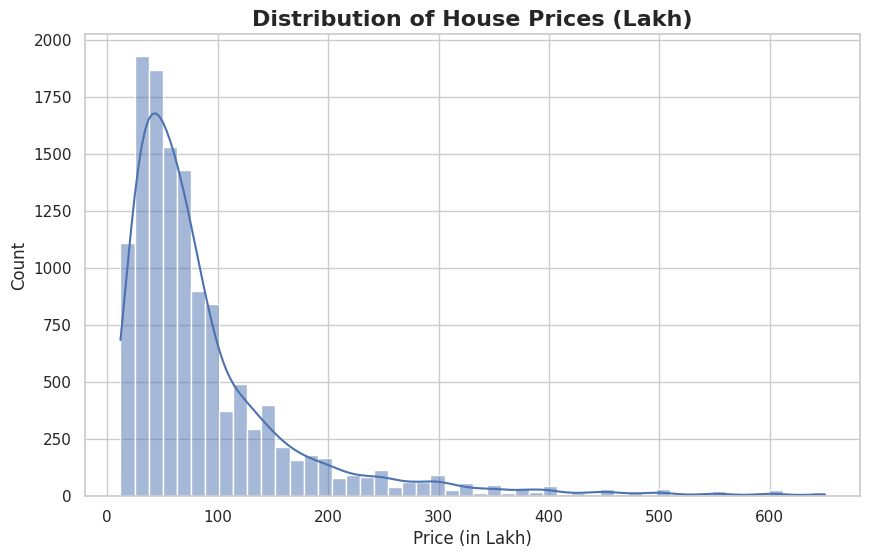

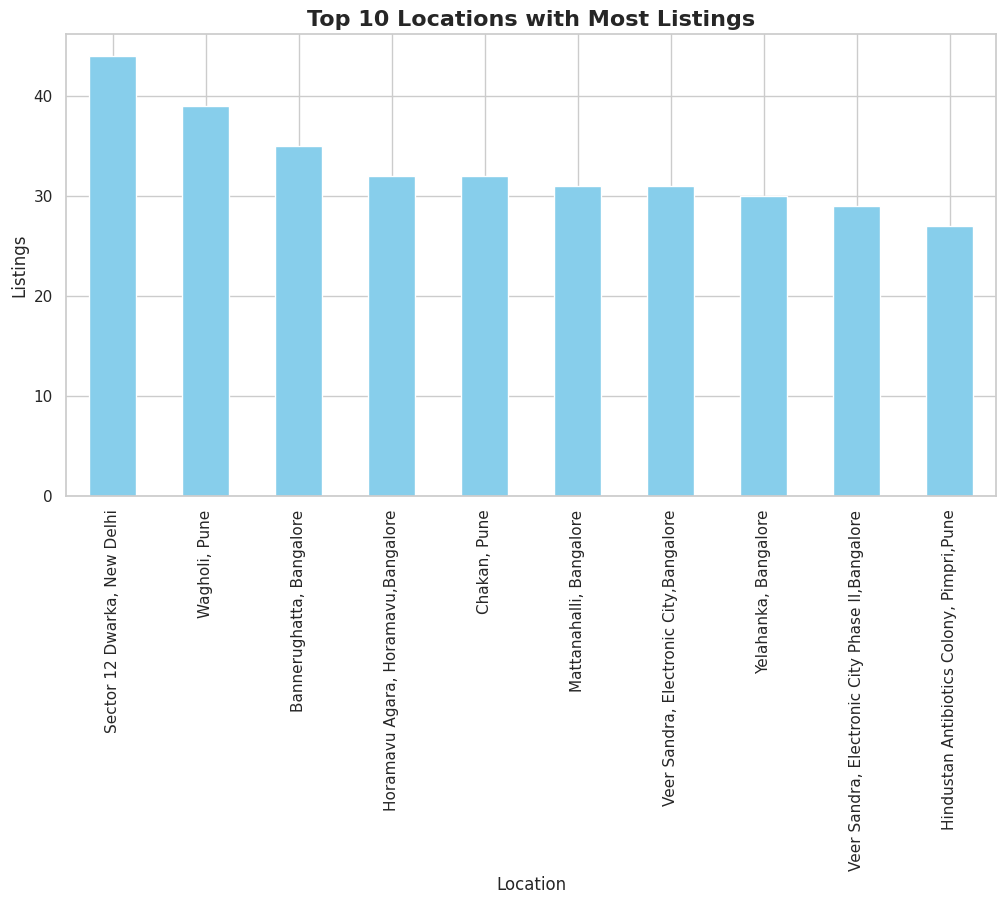

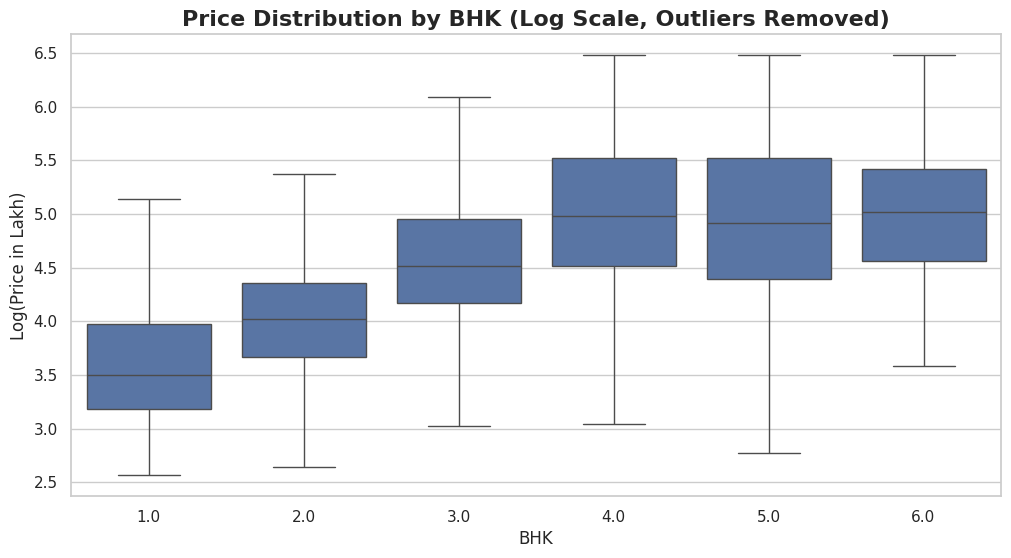

In [36]:
# Distribution of Prices
plt.figure(figsize=(10,6))
sns.histplot(df_clipped["Price_num"], bins=50, kde=True)
plt.title("Distribution of House Prices (Lakh)", fontsize=16, weight="bold")
plt.xlabel("Price (in Lakh)")
plt.ylabel("Count")
plt.show()

# Top 10 Locations
plt.figure(figsize=(12,6))
df["Location"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Locations with Most Listings", fontsize=16, weight="bold")
plt.xlabel("Location")
plt.ylabel("Listings")
plt.show()

# Price Distribution by BHK
plt.figure(figsize=(12,6))
sns.boxplot(x="BHK", y="LogPrice", data=df_clipped, showfliers=False)
plt.title("Price Distribution by BHK (Log Scale, Outliers Removed)", fontsize=16, weight="bold")
plt.xlabel("BHK")
plt.ylabel("Log(Price in Lakh)")
plt.show()
